## Final Project Submission

Please fill out:
* Student name: Jane Mwangi
* Student pace: part time
* Scheduled project review date/time: Moday 24th July 2023
* Instructor name: Stella Waithera
* Blog post URL:


# Project Overview
For this project we will use exploratory data analysis to generate insights for a microsoft.

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# Importing Necessary Packages

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting pandas display to avoid scientific notation in the dataframes
pd.options.display.float_format = '{:.2f}'.format

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### The datasets used for analysis

#### movie budgets
#### tmdb.Movies
#### title.basics

# Method 

1.Data mining - Identifiying data would answer my business question.

2.Loading of libraries

3.Data cleaning checking for missing values, duplicates, outliers, valid labels and use of up-to-date data
to ensure maximum value of the results

4.Data Exploration (Exploratory data Analysis) highliting patterns and relations in data.
use of descriptive statistics such as mean.

5.Data visualization by creating plots such as histograms, scatter plots and linegraphs identify trends and make insights.

## Loading All the Datasets

The first dataset

In [2]:
#Loading the dataset
movies_budgets = pd.read_csv("Unzipped data/tn.movie_budgets.csv")
movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#reload the data and remove extra index
movies_budgets = pd.read_csv("Unzipped data/tn.movie_budgets.csv", index_col=0)
movies_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
movies_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


The data has 5782 rows and 5 columns, no missing values. 
The production budget, domestic and worldwide gross amounts are in object types instead of integer or float.

In [5]:
movies_budgets.drop_duplicates(inplace=True)
movies_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


There are no duplicates in our data.

Next we change the data types from objects to numeric values.

In [6]:
movies_budgets['domestic_gross'] = pd.to_numeric(movies_budgets['domestic_gross'].str[1:].str.replace(',', ''))
movies_budgets['production_budget'] =pd.to_numeric(movies_budgets['production_budget'].str[1:].str.replace(',', ''))
movies_budgets['worldwide_gross'] = pd.to_numeric(movies_budgets['worldwide_gross'].str[1:].str.replace(',', ''))

movies_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Next we introduce new columns for Net Profit

In [7]:
#Intoducing new columns
movies_budgets['D_NetProfit']= movies_budgets['domestic_gross']-movies_budgets['production_budget']
movies_budgets['W_NetProfit']= movies_budgets['worldwide_gross']-movies_budgets['production_budget']
movies_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747


Next we introduce new columns for ROI,
ROI stands for Return on Investment,
The formula is ROI = (Net Profit / Cost of Investment) * 100 

In [8]:
#Calculate ROI

movies_budgets['D_ROI']= (movies_budgets['D_NetProfit']/movies_budgets['production_budget'])*100
movies_budgets['W_ROI']= (movies_budgets['W_NetProfit']/movies_budgets['production_budget'])*100
movies_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit,D_ROI,W_ROI
id,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,78.94,553.26
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-41.29,154.67
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-87.78,-57.21
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,38.84,324.38
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,95.64,315.37


In [9]:
# Convert the "release_date" column to datetime type
# Extract the release year and create a new column for it
movies_budgets['release_year'] = (pd.to_datetime(movies_budgets['release_date'])).dt.year
movies_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit,D_ROI,W_ROI,release_year
id,,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,78.94,553.26,2009
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-41.29,154.67,2011
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-87.78,-57.21,2019
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,38.84,324.38,2015
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,95.64,315.37,2017


In [10]:
# Create a new column for the release year category
movies_budgets['release_year_category'] = movies_budgets['release_year'].apply(
    lambda year: 'before 2010' if year <= 2009 else 'After 2010')
movies_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit,D_ROI,W_ROI,release_year,release_year_category
id,,,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,78.94,553.26,2009,before 2010
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-41.29,154.67,2011,After 2010
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-87.78,-57.21,2019,After 2010
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,38.84,324.38,2015,After 2010
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,95.64,315.37,2017,After 2010


We change the name of the column 'movie' to 'title' so that it corresponds to 'title' in the movies data set that we will merge with later.

In [11]:
# Changing rem=naming the column name 'movie' to 'title' for ease in merging of datasets
movies_budgets.rename(columns={'movie': 'title'}, inplace=True)
movies_budgets

,release_date,title,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit,D_ROI,W_ROI,release_year,release_year_category
id,,,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,78.94,553.26,2009,before 2010
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-41.29,154.67,2011,After 2010
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-87.78,-57.21,2019,After 2010
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,38.84,324.38,2015,After 2010
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,95.64,315.37,2017,After 2010
...,...,...,...,...,...,...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0,-7000,-7000,-100.00,-100.00,2018,After 2010
79,"Apr 2, 1999",Following,6000,48482,240495,42482,234495,708.03,3908.25,1999,before 2010
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,-3662,-73.24,-73.24,2005,before 2010


In [12]:
#Checking the details of our dataset
movies_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   release_date           5782 non-null   object 
 1   title                  5782 non-null   object 
 2   production_budget      5782 non-null   int64  
 3   domestic_gross         5782 non-null   int64  
 4   worldwide_gross        5782 non-null   int64  
 5   D_NetProfit            5782 non-null   int64  
 6   W_NetProfit            5782 non-null   int64  
 7   D_ROI                  5782 non-null   float64
 8   W_ROI                  5782 non-null   float64
 9   release_year           5782 non-null   int64  
 10  release_year_category  5782 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 542.1+ KB


Second dataset

In [13]:
#Loading the dataset
movies = pd.read_csv("Unzipped data/tmdb.movies.csv")
movies 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


In [14]:
#reload the data and remove extra index
movies = pd.read_csv("Unzipped data/tmdb.movies.csv", index_col=0)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


In [15]:
#Checking the details of our data
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [16]:
#Dropping duplicates rows
movies.drop_duplicates(inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


We have dropped 1020 rows that were duplicates.

Third dataset

In [17]:
#Loading the dataset
basics = pd.read_csv("Unzipped data/title.basics.csv")

basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [18]:
#Checking the details of our dataset
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


Reason for picking this data hence reson to drop

In [19]:
#Checking for null values
basics.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [20]:
#Dropping all rows with null values
basics.dropna(inplace=True)

In [21]:
# Counter checking for missing values
basics.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [22]:
#Dropping duplicates and saving the changes
basics.drop_duplicates(inplace=True)
basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.00,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.00,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.00,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"Drama,Thriller"


In [23]:
# Checking the details of our data
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
#Changing the 'Primary title' to 'title'
basics.rename(columns={'primary_title': 'title'}, inplace=True)
basics

,tconst,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.00,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.00,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.00,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.00,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.00,"Drama,Thriller"


# Merging datasets

First Merge

In [25]:
# Merging movie budgets and movies datasets
movies_updated = movies_budgets.merge(movies, on="title", how="inner")
movies_updated.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit,D_ROI,W_ROI,release_year,release_year_category,genre_ids,id,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,78.94,553.26,2009,before 2010,"[28, 12, 14, 878]",19995,en,Avatar,26.53,2009-12-18,7.40,18676
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-41.29,154.67,2011,After 2010,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.58,2011-05-20,6.40,8571
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,38.84,324.38,2015,After 2010,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.38,2015-05-01,7.30,13457
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,126.27,582.71,2018,After 2010,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.77,2018-04-27,8.30,13948
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,-70975705,355945209,-23.66,118.65,2017,After 2010,"[28, 12, 14, 878]",141052,en,Justice League,34.95,2017-11-17,6.20,7510


In [26]:
#Checking details of the merge
movies_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   release_date_x         2211 non-null   object 
 1   title                  2211 non-null   object 
 2   production_budget      2211 non-null   int64  
 3   domestic_gross         2211 non-null   int64  
 4   worldwide_gross        2211 non-null   int64  
 5   D_NetProfit            2211 non-null   int64  
 6   W_NetProfit            2211 non-null   int64  
 7   D_ROI                  2211 non-null   float64
 8   W_ROI                  2211 non-null   float64
 9   release_year           2211 non-null   int64  
 10  release_year_category  2211 non-null   object 
 11  genre_ids              2211 non-null   object 
 12  id                     2211 non-null   int64  
 13  original_language      2211 non-null   object 
 14  original_title         2211 non-null   object 
 15  popu

In [27]:
#Merging the third dataset named 'basics'
movies_merged = movies_updated.merge(basics, on="title", how="inner")
movies_merged.head()

,release_date_x,title,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit,D_ROI,W_ROI,release_year,...,original_title_x,popularity,release_date_y,vote_average,vote_count,tconst,original_title_y,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,78.94,553.26,2009,...,Avatar,26.53,2009-12-18,7.40,18676,tt1775309,Abatâ,2011,93.00,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-41.29,154.67,2011,...,Pirates of the Caribbean: On Stranger Tides,30.58,2011-05-20,6.40,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.00,"Action,Adventure,Fantasy"
2,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,38.84,324.38,2015,...,Avengers: Age of Ultron,44.38,2015-05-01,7.30,13457,tt2395427,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi"
3,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,126.27,582.71,2018,...,Avengers: Infinity War,80.77,2018-04-27,8.30,13948,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi"
4,"Nov 17, 2017",Justice League,300000000,229024295,655945209,-70975705,355945209,-23.66,118.65,2017,...,Justice League,34.95,2017-11-17,6.20,7510,tt0974015,Justice League,2017,120.00,"Action,Adventure,Fantasy"


In [28]:
#Checking the details of the merged data
movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3826 entries, 0 to 3825
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   release_date_x         3826 non-null   object 
 1   title                  3826 non-null   object 
 2   production_budget      3826 non-null   int64  
 3   domestic_gross         3826 non-null   int64  
 4   worldwide_gross        3826 non-null   int64  
 5   D_NetProfit            3826 non-null   int64  
 6   W_NetProfit            3826 non-null   int64  
 7   D_ROI                  3826 non-null   float64
 8   W_ROI                  3826 non-null   float64
 9   release_year           3826 non-null   int64  
 10  release_year_category  3826 non-null   object 
 11  genre_ids              3826 non-null   object 
 12  id                     3826 non-null   int64  
 13  original_language      3826 non-null   object 
 14  original_title_x       3826 non-null   object 
 15  popu

The merged dataset has 3826 rows and 24 columns.
No missing data and duplicates. 

Next we drop the extra columns

In [29]:
columns_to_drop = ['release_date_x', 'original_title_x']
movies_merged.drop(columns=columns_to_drop, inplace=True)
movies_merged.head()

,title,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit,D_ROI,W_ROI,release_year,release_year_category,...,original_language,popularity,release_date_y,vote_average,vote_count,tconst,original_title_y,start_year,runtime_minutes,genres
0,Avatar,425000000,760507625,2776345279,335507625,2351345279,78.94,553.26,2009,before 2010,...,en,26.53,2009-12-18,7.40,18676,tt1775309,Abatâ,2011,93.00,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,-41.29,154.67,2011,After 2010,...,en,30.58,2011-05-20,6.40,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.00,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,38.84,324.38,2015,After 2010,...,en,44.38,2015-05-01,7.30,13457,tt2395427,Avengers: Age of Ultron,2015,141.00,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,126.27,582.71,2018,After 2010,...,en,80.77,2018-04-27,8.30,13948,tt4154756,Avengers: Infinity War,2018,149.00,"Action,Adventure,Sci-Fi"
4,Justice League,300000000,229024295,655945209,-70975705,355945209,-23.66,118.65,2017,After 2010,...,en,34.95,2017-11-17,6.20,7510,tt0974015,Justice League,2017,120.00,"Action,Adventure,Fantasy"


I plan to focus on maximizing profit, so I will remove any rows with a negative domestic net profit, indicating a loss.

In [30]:
# Drop rows with losses (where 'D_Netprofit' is less than or equal to 0)
movies_merged.drop(movies_merged[movies_merged['D_NetProfit'] <= 0].index, inplace=True)

The next step is sorting my data in descending order starting with the domestic ROI then world ROI.

In [31]:
# Sorting based on 'D_ROI' and 'W_ROI' (descending)
movies_merged = movies_merged.sort_values(by=['D_ROI','W_ROI'], ascending=[False, False])
movies_merged

,title,production_budget,domestic_gross,worldwide_gross,D_NetProfit,W_NetProfit,D_ROI,W_ROI,release_year,release_year_category,...,original_language,popularity,release_date_y,vote_average,vote_count,tconst,original_title_y,start_year,runtime_minutes,genres
3776,The Gallows,100000,22764410,41656474,22664410,41556474,22664.41,41556.47,2015,After 2010,...,en,9.17,2015-07-10,4.80,591,tt2309260,The Gallows,2015,81.00,"Horror,Mystery,Thriller"
2192,Halloween,325000,47000000,70000000,46675000,69675000,14361.54,21438.46,1978,before 2010,...,en,20.84,2018-10-19,6.40,2020,tt1502407,Halloween,2018,106.00,"Horror,Thriller"
3041,Night of the Living Dead,114000,12087064,30087064,11973064,29973064,10502.69,26292.16,1968,before 2010,...,en,0.60,2014-10-24,6.50,1,tt3393372,Night of the Living Dead,2014,79.00,Horror
3716,Graduation Day,250000,23894000,23894000,23644000,23644000,9457.60,9457.60,1981,before 2010,...,en,0.60,2015-01-01,5.00,1,tt2616818,Graduation Day,2015,75.00,Thriller
2482,The Birth of a Nation,110000,10000000,11000000,9890000,10890000,8990.91,9900.00,1915,before 2010,...,en,8.15,2016-10-07,6.50,328,tt4196450,The Birth of a Nation,2016,120.00,"Biography,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,Lovesick,10100000,10143618,10143618,43618,43618,0.43,0.43,1983,before 2010,...,en,4.78,2014-04-24,5.00,44,tt2404299,Lovesick,2014,85.00,"Comedy,Romance"
2433,Lovesick,10100000,10143618,10143618,43618,43618,0.43,0.43,1983,before 2010,...,en,4.78,2014-04-24,5.00,44,tt4996022,Lovesick,2016,93.00,"Drama,Romance"
814,Sex and the City 2,95000000,95347692,294680778,347692,199680778,0.37,210.19,2010,After 2010,...,en,9.99,2010-05-27,5.90,809,tt1261945,Sex and the City 2,2010,146.00,"Comedy,Drama,Romance"
1154,The Book of Life,50000000,50151543,97651543,151543,47651543,0.30,95.30,2014,After 2010,...,en,11.39,2014-10-17,7.40,1228,tt2262227,The Book of Life,2014,95.00,"Adventure,Animation,Comedy"


In [32]:
# Checking data structure and identifying any missing or inconsistent values in our dataFrame before
#we start on visualizations
movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 3776 to 1155
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1535 non-null   object 
 1   production_budget      1535 non-null   int64  
 2   domestic_gross         1535 non-null   int64  
 3   worldwide_gross        1535 non-null   int64  
 4   D_NetProfit            1535 non-null   int64  
 5   W_NetProfit            1535 non-null   int64  
 6   D_ROI                  1535 non-null   float64
 7   W_ROI                  1535 non-null   float64
 8   release_year           1535 non-null   int64  
 9   release_year_category  1535 non-null   object 
 10  genre_ids              1535 non-null   object 
 11  id                     1535 non-null   int64  
 12  original_language      1535 non-null   object 
 13  popularity             1535 non-null   float64
 14  release_date_y         1535 non-null   object 
 15  v

The resulting dataframe after cleaning and merging has 1535 rows, 22 columns and no missing values or duplicates.

## Visualizations

1.Matrix Heatmap

The matrix heatmap below helps us to visualize the correlation between selected numerical columns in the 'movies_merged' DataFrame

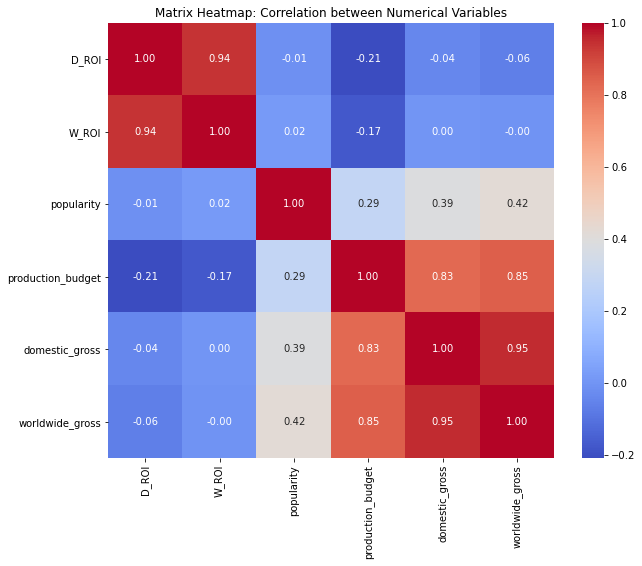

In [33]:
# Select the numerical columns for the matrix heatmap
numerical_columns = ['D_ROI', 'W_ROI', 'popularity', 'production_budget', 'domestic_gross','worldwide_gross']

# Calculate the correlation matrix for the selected numerical columns
correlation_matrix = movies_merged[numerical_columns].corr()

# Set up the plot
plt.figure(figsize=(10, 8))

# Create the matrix heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Set the plot title
plt.title('Matrix Heatmap: Correlation between Numerical Variables')

# Display the plot
plt.show()


The heatmap provides a quick overview of the patterns and relationships between the selected numerical columns.

For instance, our data indicates that popularity might have some significance, although not high with domestic(0.39) and worldwide(0.42) gross output. At the same time popularity shows no correlation with ROIs as the correlation is close to zero.

There is a strong correlation of 0.94 between domestic ROI and worldwide ROI, suggesting that if a movie performs well domestically, it is likely to perform well worldwide and vice versa. This correlation serves as a good indicator in projecting ROI, as movie premieres are typically first done domestically before being released worldwide.

Additionally, there is a high correlation between production budget and domestic as well as worldwide gross output. This implies that a substantial investment in the movie's production leads to higher output. The increased production costs could arise from expenses related to actors' payments, marketing efforts, and so on.

Interestingly, the production budget shows almost no relationship with domestic or worldwide ROI, as the correlation is close to zero. This suggests that a high production budget does not necessarily translate into a high ROI. Other factors play a crucial role in determining the ROI besides the production budget.

We will further investigate the relationship between ROI and other factors in the subsequent visuals.

2.Scatter Plots

The Scatter plots below show side by side comparison of the 'Domestic ROI' (D_ROI) and 'Worldwide ROI' (W_ROI) against the index values of the 'movies_merged' data.

The Index here represents the different movie titles.

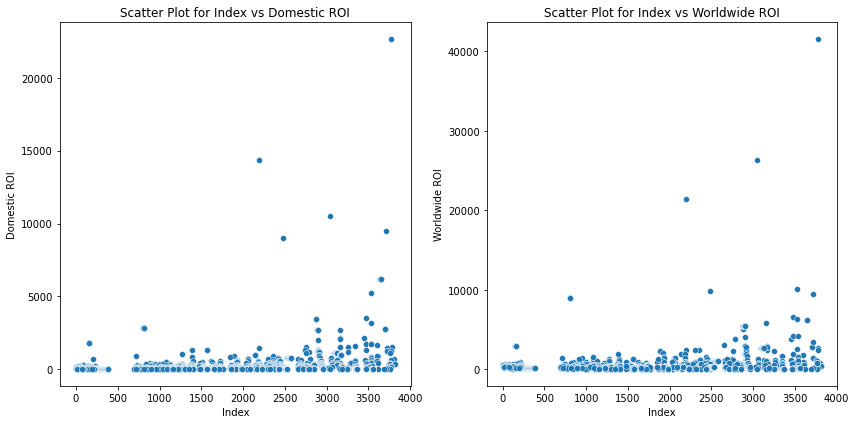

In [34]:
# Set up the plots
plt.figure(figsize=(12, 6))

# Scatter plot for D_ROI (Domestic ROI)
plt.subplot(1, 2, 1)
sns.scatterplot(x=movies_merged.index, y='D_ROI', data=movies_merged)
plt.title('Scatter Plot for Index vs Domestic ROI')
plt.xlabel('Index')
plt.ylabel('Domestic ROI')

# Scatter plot for W_ROI (Worldwide ROI)
plt.subplot(1, 2, 2)
sns.scatterplot(x=movies_merged.index, y='W_ROI', data=movies_merged)
plt.title('Scatter Plot for Index vs Worldwide ROI')
plt.xlabel('Index')
plt.ylabel('Worldwide ROI')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


From the the scatter plot we see that majority of the ROI is less that 5000. There are a few outliers that have an ROI of above 1000. 
For our study we will focus on majority of the data to provide the insights we need. we will therefore filter out anything with an ROI of more than 1000.

In [35]:
# Filter out rows with 'D_ROI' and 'W_ROI' greater than 1000
movies_merged = movies_merged[(movies_merged['D_ROI'] <= 1000) & (movies_merged['W_ROI'] <= 1000)]


3. Filtered Scatter Plots

Filtered scatter plots show the Domestic ROI and Worldwide ROI after removing the outliers.

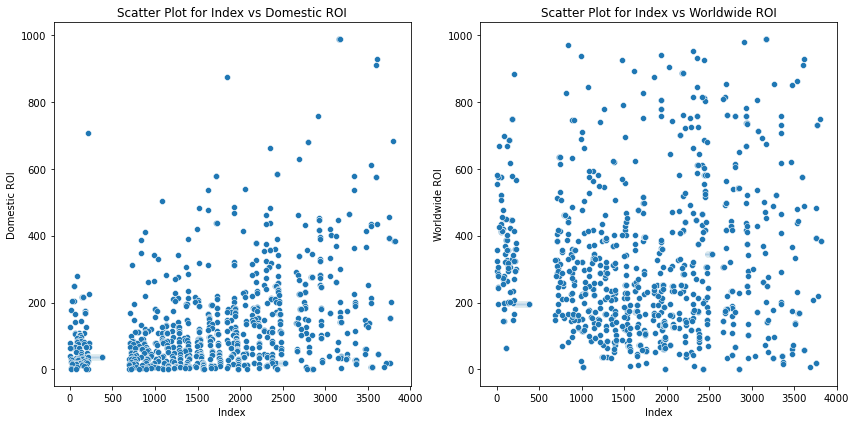

In [36]:
# Set up the plots
plt.figure(figsize=(12, 6))

# Scatter plot for D_ROI (Domestic ROI)
plt.subplot(1, 2, 1)
sns.scatterplot(x=movies_merged.index, y='D_ROI', data=movies_merged)
plt.title('Scatter Plot for Index vs Domestic ROI')
plt.xlabel('Index')
plt.ylabel('Domestic ROI')

# Scatter plot for W_ROI (Worldwide ROI)
plt.subplot(1, 2, 2)
sns.scatterplot(x=movies_merged.index, y='W_ROI', data=movies_merged)
plt.title('Scatter Plot for Index vs Worldwide ROI')
plt.xlabel('Index')
plt.ylabel('Worldwide ROI')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


After removing the outliers, we observe that the majority of our domestic ROI falls within the range of 0 to 200.

Conversely, the worldwide ROI shows a wide scatter. It is highly dispersed and not confined to a specific range.

From these findings, we can infer that while we can make predictions about a movie's domestic performance, it is
challenging to predict its worldwide success.

Next we want to see the relation between Genres and other variables.

4.Top 20 Genres vs. Domestic and Worldwide ROI with the highest mean Domestic ROI.

The scatter plot will help us to visually observe any patterns or relationships between Domestic ROI and Worldwide ROIs within the selected genres. 

The x-axis labels (genres) are rotated by 90 degrees for better visibility.

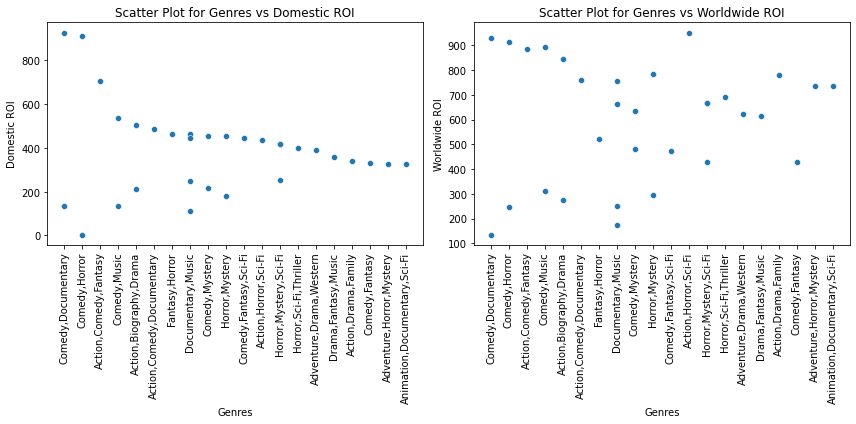

In [37]:
# Calculate top 20 genres based on mean Domestic ROI (D_ROI)
top_20_genres = movies_merged.groupby('genres')['D_ROI'].mean().nlargest(20).index

# Filter the DataFrame to include only data related to the top 20 genres
movies_filtered = movies_merged[movies_merged['genres'].isin(top_20_genres)]

# Set up the plots
plt.figure(figsize=(12, 6))

# Scatter plot for D_ROI (Domestic ROI)
plt.subplot(1, 2, 1)
sns.scatterplot(x='genres', y='D_ROI', data=movies_filtered)
plt.title('Scatter Plot for Genres vs Domestic ROI')
plt.xlabel('Genres')
plt.ylabel('Domestic ROI')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Scatter plot for W_ROI (Worldwide ROI)
plt.subplot(1, 2, 2)
sns.scatterplot(x='genres', y='W_ROI', data=movies_filtered)
plt.title('Scatter Plot for Genres vs Worldwide ROI')
plt.xlabel('Genres')
plt.ylabel('Worldwide ROI')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



The data reveals that most of the top 20 best-performing genres in the domestic category achieve ROIs between 350 and 500. This insight guides us in selecting genres that can yield high ROI.

In contrast, the worldwide category displays a scattered pattern, suggesting lower predictability or consistency in genre performance across the globe. Despite this, we observe that there are genres in our data have delivered exceptionally high worldwide ROI and deserve consideration.

They are listed below.

In [38]:
# Calculate top genres based on mean Worldwide ROI (W_ROI)
top_genres_w_roi = movies_filtered.groupby('genres')['W_ROI'].mean().nlargest(5).index.tolist()

print("Top genres based on Worldwide ROI:")
print(top_genres_w_roi)


Top genres based on Worldwide ROI:
['Action,Horror,Sci-Fi', 'Action,Comedy,Fantasy', 'Action,Drama,Family', 'Action,Comedy,Documentary', 'Adventure,Horror,Mystery']


5.The following Scatter plot depicts the relationship between popularity and genres.

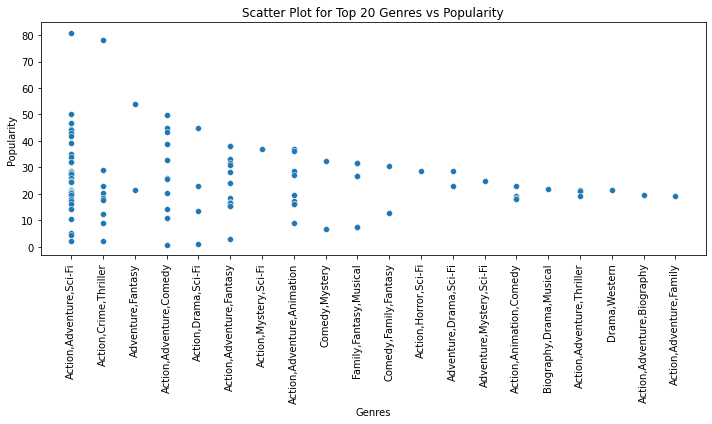

In [39]:
# Calculate the mean popularity for each genre in the 'movies_merged' DataFrame
top_20_genres = movies_merged.groupby('genres')['popularity'].mean().nlargest(20).index

# Filter the 'movies_merged' DataFrame to include only data related to the top 20 genres based on popularity
movies_filtered = movies_merged[movies_merged['genres'].isin(top_20_genres)]

# Sort the 'movies_filtered' DataFrame by popularity in descending order
movies_filtered = movies_filtered.sort_values(by='popularity', ascending=False)

# Set up the scatter plot
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the relationship between the top 20 genres and their popularity
sns.scatterplot(x='genres', y='popularity', data=movies_filtered)

# Add a title and labels to the plot
plt.title('Scatter Plot for Top 20 Genres vs Popularity')
plt.xlabel('Genres')
plt.ylabel('Popularity')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



The above visual tells us the popular genres. 

Genres with High Popularity:
['Action,Adventure,Sci-Fi' 'Action,Crime,Thriller' 'Adventure,Fantasy'
 'Action,Adventure,Comedy' 'Action,Drama,Sci-Fi' 'Comedy,Drama,Family'
 'Thriller' 'Action,Sci-Fi,Thriller']

It looks like people really like Action movies!

6. Top 20 Genres vs. Domestic and Worldwide ROI

Bar plots show the performance of the top 20 movie genres based on their mean Domestic ROI, Worldwide ROI, and popularity.


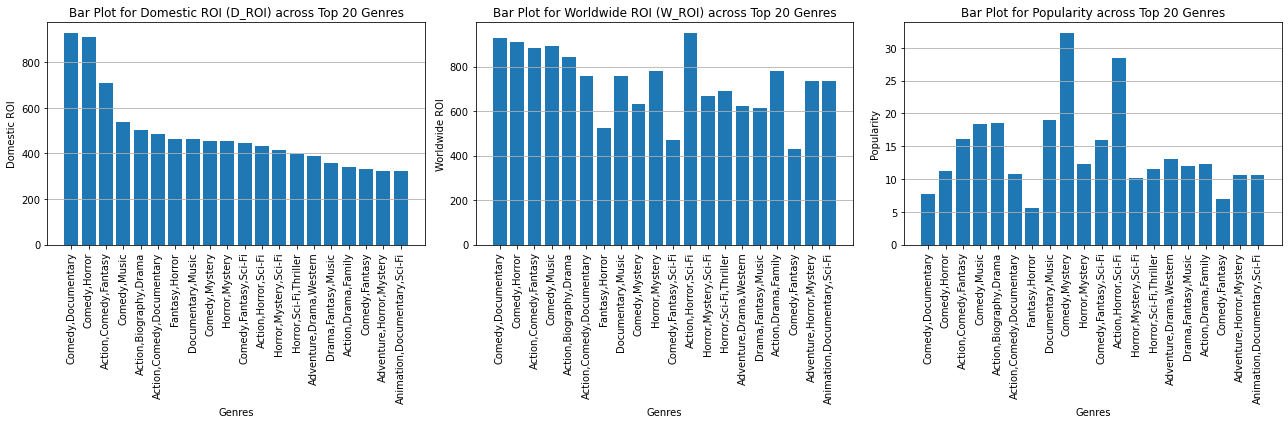

In [40]:
# Calculate top 20 genres based on mean Domestic ROI (D_ROI)
top_20_genres = movies_merged.groupby('genres')['D_ROI'].mean().nlargest(20).index

# Filter the DataFrame to include only data related to the top 20 genres
movies_filtered = movies_merged[movies_merged['genres'].isin(top_20_genres)]

# Set up the plots
plt.figure(figsize=(18, 6))  # Increased figure size to accommodate three subplots

# Bar plot for D_ROI across top 20 genres
plt.subplot(1, 3, 1)
plt.bar(movies_filtered['genres'], movies_filtered['D_ROI'])
plt.title('Bar Plot for Domestic ROI (D_ROI) across Top 20 Genres')
plt.xlabel('Genres')
plt.ylabel('Domestic ROI')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines to the y-axis

# Bar plot for W_ROI across top 20 genres
plt.subplot(1, 3, 2)
plt.bar(movies_filtered['genres'], movies_filtered['W_ROI'])
plt.title('Bar Plot for Worldwide ROI (W_ROI) across Top 20 Genres')
plt.xlabel('Genres')
plt.ylabel('Worldwide ROI')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines to the y-axis

# Bar plot for popularity across top 20 genres
plt.subplot(1, 3, 3)
plt.bar(movies_filtered['genres'], movies_filtered['popularity'])
plt.title('Bar Plot for Popularity across Top 20 Genres')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines to the y-axis

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


The bar plots above provide additional insights based on our previous findings.

Domestic: The top three genres, namely 'Comedy, Documentary,' 'Comedy, Horror,' and 'Action, Comedy, Fantasy,' have achieved remarkable success. They should be strongly considered as they demonstrate high performance both domestically and worldwide.

Speaking of worldwide performance, other genres such as 'Action, Horror, Sci-fi' have also performed exceptionally well.

Regarding popularity, 'Comedy, Mystery,' and 'Action, Horror, Sci-fi' appear to be particularly popular among the audience.

Next we want to see the relation between original language and other variables.

7. Languages vs. Frequency & Popularity

Bar plots compare the top five languages and their relationship with popularity.


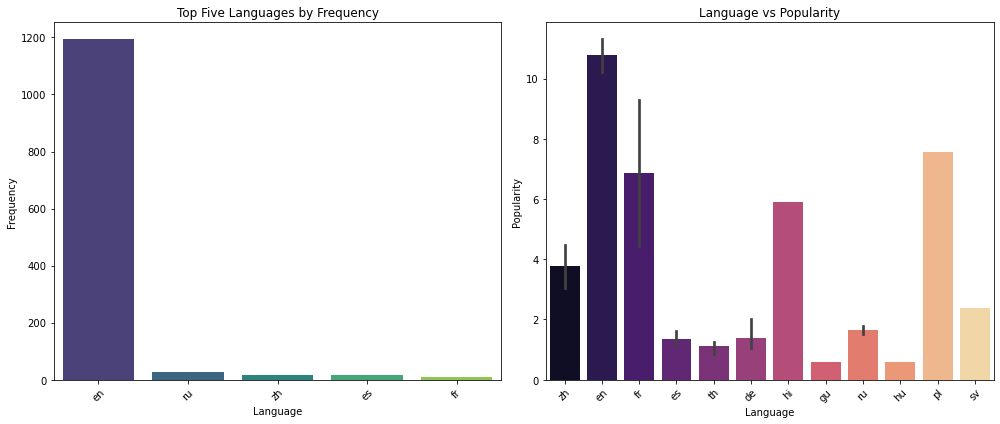

In [41]:
# Get the frequency of each language in the 'original_language' column
language_counts = movies_merged['original_language'].value_counts()

# Get the top five languages by frequency
top_five_languages = language_counts.head(5)

# Set up the side-by-side bar plot
plt.figure(figsize=(14, 6))

# Bar plot for top five languages by frequency
plt.subplot(1, 2, 1)
sns.barplot(x=top_five_languages.index, y=top_five_languages.values, palette='viridis')
plt.title('Top Five Languages by Frequency')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Bar plot for language vs popularity
plt.subplot(1, 2, 2)
sns.barplot(x='original_language', y='popularity', data=movies_merged, palette='magma')
plt.title('Language vs Popularity')
plt.xlabel('Language')
plt.ylabel('Popularity')
plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


This plot enables us to swiftly identify the five most frequently occurring languages in our data set and their corresponding frequencies. English stands out prominently, followed by Russian, Chinese, Spanish, and French.

The second bar plot provides valuable insights into which languages tend to have more popular movies. We observe that English remains the most popular, followed by Polish, French, and Hindi with high levels of popularity.

8. Top 20 Original Languages vs. Domestic and Worldwide ROI

Bar plots show the relationship between Return on Investment and the top 20 original languages.


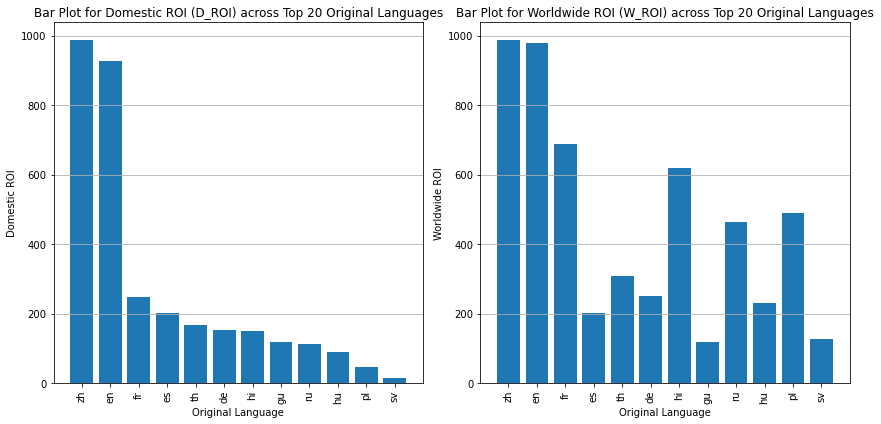

In [42]:
# Calculate top 20 original languages based on mean Domestic ROI (D_ROI)
top_20_languages = movies_merged.groupby('original_language')['D_ROI'].mean().nlargest(20).index

# Filter the DataFrame to include only data related to the top 20 original languages
movies_filtered = movies_merged[movies_merged['original_language'].isin(top_20_languages)]

# Set up the plots
plt.figure(figsize=(12, 6))  # Decreased figure size as we have two subplots now

# Bar plot for D_ROI across top 20 original languages
plt.subplot(1, 2, 1)
plt.bar(movies_filtered['original_language'], movies_filtered['D_ROI'])
plt.title('Bar Plot for Domestic ROI (D_ROI) across Top 20 Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Domestic ROI')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines to the y-axis

# Bar plot for W_ROI across top 20 original languages
plt.subplot(1, 2, 2)
plt.bar(movies_filtered['original_language'], movies_filtered['W_ROI'])
plt.title('Bar Plot for Worldwide ROI (W_ROI) across Top 20 Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Worldwide ROI')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines to the y-axis

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


The visual above reveals that both domestically and worldwide, English and Chinese exhibit exceptionally high ROI.

In addition to French and Hindi, Russian and Polish also show remarkable ROI on a global scale.

9. Runtime vs. Popularity

A scatter plot illustrates the relationship between the runtime (duration of the movie in minutes) of a movie and its popularity.


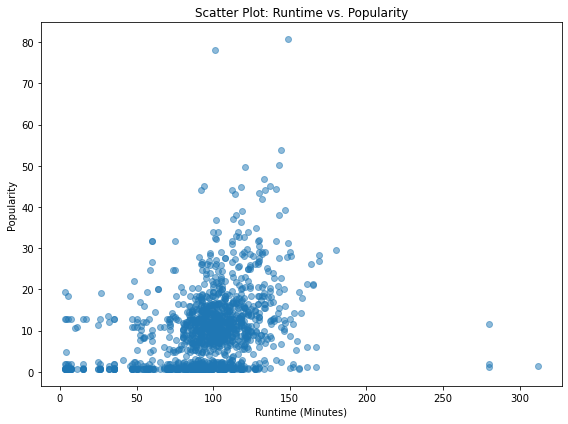

In [43]:
# Set up the plot
plt.figure(figsize=(8, 6))

# Create the scatter plot for 'runtime_minutes' vs. 'popularity'
plt.scatter(movies_merged['runtime_minutes'], movies_merged['popularity'], alpha=0.5)

# Set labels and title
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Runtime vs. Popularity')

# Display the plot
plt.tight_layout()
plt.show()


The Scatter plot above indicates there is no clear correlation between the runtime and popularity of a movie.

10. Release Year vs. Average ROI

Line plots compare the average ROI for both the domestic and worldwide movie markets over the years.


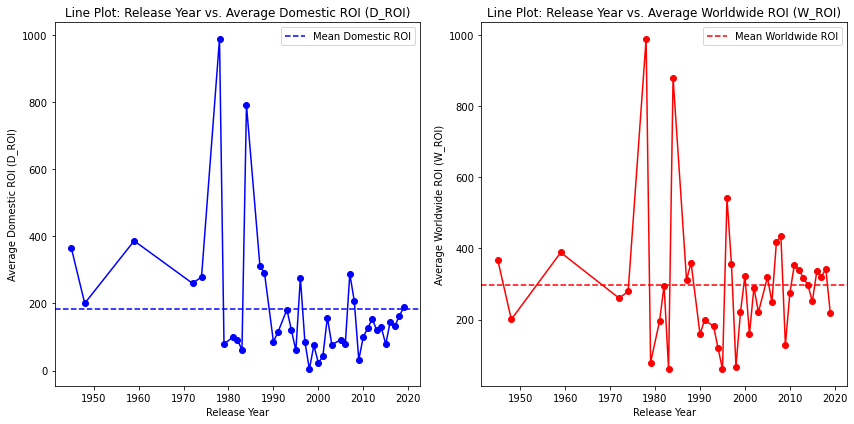

In [44]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Group the data by release year and calculate the mean ROI for each year
roi_domestic_by_year = movies_merged.groupby('release_year')['D_ROI'].mean()
roi_worldwide_by_year = movies_merged.groupby('release_year')['W_ROI'].mean()

# Create the line plot for release years vs. Domestic ROI
plt.subplot(1, 2, 1)
plt.plot(roi_domestic_by_year.index, roi_domestic_by_year.values, marker='o', linestyle='-', color='b')
plt.axhline(y=roi_domestic_by_year.mean(), color='b', linestyle='dashed', label='Mean Domestic ROI')
plt.xlabel('Release Year')
plt.ylabel('Average Domestic ROI (D_ROI)')
plt.title('Line Plot: Release Year vs. Average Domestic ROI (D_ROI)')
plt.legend()

# Create the line plot for release years vs. Worldwide ROI
plt.subplot(1, 2, 2)
plt.plot(roi_worldwide_by_year.index, roi_worldwide_by_year.values, marker='o', linestyle='-', color='r')
plt.axhline(y=roi_worldwide_by_year.mean(), color='r', linestyle='dashed', label='Mean Worldwide ROI')
plt.xlabel('Release Year')
plt.ylabel('Average Worldwide ROI (W_ROI)')
plt.title('Line Plot: Release Year vs. Average Worldwide ROI (W_ROI)')
plt.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In the domestic market, the average ROI has notably declined over the years, now falling below the mean, which is approximately 200.

On the other hand, in the worldwide market, the numbers have consistently remained above the average all-time Worldwide ROI mean of 300, with occasional slight drops.

This valuable insight allows us to develop more realistic expectations regarding returns on investment in the movie industry. By comprehending the downward trend in average ROI, we can make informed decisions and better strategize for potential outcomes when investing in movies.

# Recommendations:

Focus on Genres with High Domestic ROI: Concentrate on genres like 'Comedy, Documentary,' 'Comedy, Horror,' and 'Action, Comedy, Fantasy' that have historically shown high performance in the domestic market.

Explore Genres with High Worldwide ROI: Consider genres like 'Action, Horror, Sci-fi' that have demonstrated exceptional worldwide performance for potential global success.

Leverage Popularity of Action Movies: Incorporate action elements into various genres to capitalize on the high popularity of action films.

Language Selection: English and Chinese movies have consistently achieved high ROI worldwide. Expanding into the Chinese market can enhance global reach.

Caution with Production Budget: Be mindful of budget allocation, as higher production costs do not guarantee a high ROI. Prioritize engaging storytelling and effective marketing.

Balance Domestic and Worldwide Focus: As the domestic market's average ROI declines, maintain a balanced approach between domestic and international film productions to ensure overall success and diversity in the movie portfolio.

# Conclusion:
The analysis of the movie industry data offers valuable insights for Microsoft's new movie studio. By identifying genres with high domestic and worldwide ROI, the studio can strategically focus on producing successful films for both markets. Action movies, being popular, present promising investment opportunities, and exploring genres like 'Action, Horror, Sci-fi' can lead to global success. However, caution is necessary regarding the relationship between production budgets and ROI, as other factors influence a movie's financial success. Understanding market trends and making informed decisions based on historical data can increase the chances of creating profitable films. 

Acknowledging the declining domestic ROI trend while recognizing higher worldwide ROI, the studio should balance domestic and international film releases for optimal success in the competitive movie industry. A data-driven approach and understanding of market dynamics can position Microsoft's movie studio for positive impact and growth in the entertainment landscape.